# HEART STROKE PREDICTOR

SUMMARY --

*   PERFORMED EDA AND VISUALIZATION ON DATA 
*   BALANCING DATASET USING OVERSAMPLING TECHNIQUE SMOTE
*   PERFORMED DIMENSIONALITY REDUCTION(PCA) TO REDUCE DIMENSIONS(ELBOW METHOD) AS WELL AS VIEWING DATA BY REDUCING DIMENSIONS
*   FITTING MODELS ON OVERSAMPLED DATA(LOGISTIC ,SVM RBF,SVM POLY
KNN,RANDOM FOREST)
*   SCALING THE DATA FOR NEURAL NETWORKS(3 DIFFERENT NEURAL NETWORKS OF DIFFERENT ARCHITECTURE USED)(EARLY STOPPING USED)
*   FITTING MODELS ON OVERSAMPLED SCALED DATA(LOGISTIC ,SVM RBF,
RANDOM FOREST,KNN, GAUSSIAN NAIVE BAYES)

------------------------------------------------------------------------------------------------------------------

## IMPORTING LIBRARIES

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import keras
from keras import models
from keras import layers,activations
from keras.callbacks import EarlyStopping

#### IMPORTING DATASET

In [3]:
from google.colab import files
uploaded = files.upload()

Saving stroke_data.csv to stroke_data (1).csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['stroke_data.csv']))

###  EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
df   #OUR DATASET IN PANDAS DATAFRAME FORMAT

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
29061,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
29062,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
29063,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


AS WE CAN SEE THERE ARE NO NULL VALUES IN OUR DATASET AND THE DATATYPES OF COLUMNS ARE DIFFERENT.WE HAVE A TOTAL OF 29065 EXAMPLES IN DATASET.

In [7]:
df.describe()  

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,47.676174,0.111509,0.052159,106.405639,30.054684,0.018854
std,18.732941,0.314766,0.222351,45.272453,7.193951,0.136013
min,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,32.000000,0.000000,0.000000,77.630000,25.000000,0.000000
50%,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000


-----------------------------------------------------------------------------------------------------------------

### PRE PROCESSING DIFFERENT CATEGORICAL COLUMNS OF OUR DATASET

In [8]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

### LABEL ENCODING OUR CATEGORICAL

In [13]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})

In [14]:
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})

In [15]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 0 ,'Rural':1})

In [16]:
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'formerly smoked':1,'smokes':2})

In [17]:
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

----------------------------------------------------------------------------------------------------

### VIEWING OUR DIFFERENT FEATURES AND THEIR CORRELATIONS

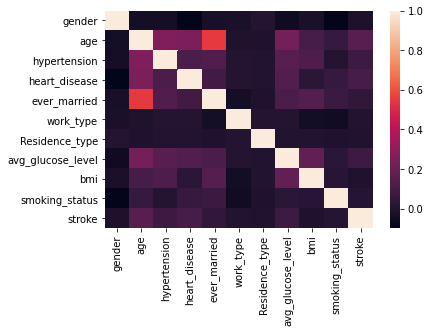

In [18]:
sns.heatmap(df.corr())   #HEATMAP SHOWING DIFFERENT CORRELATIONS BETWEEN COLUMNS

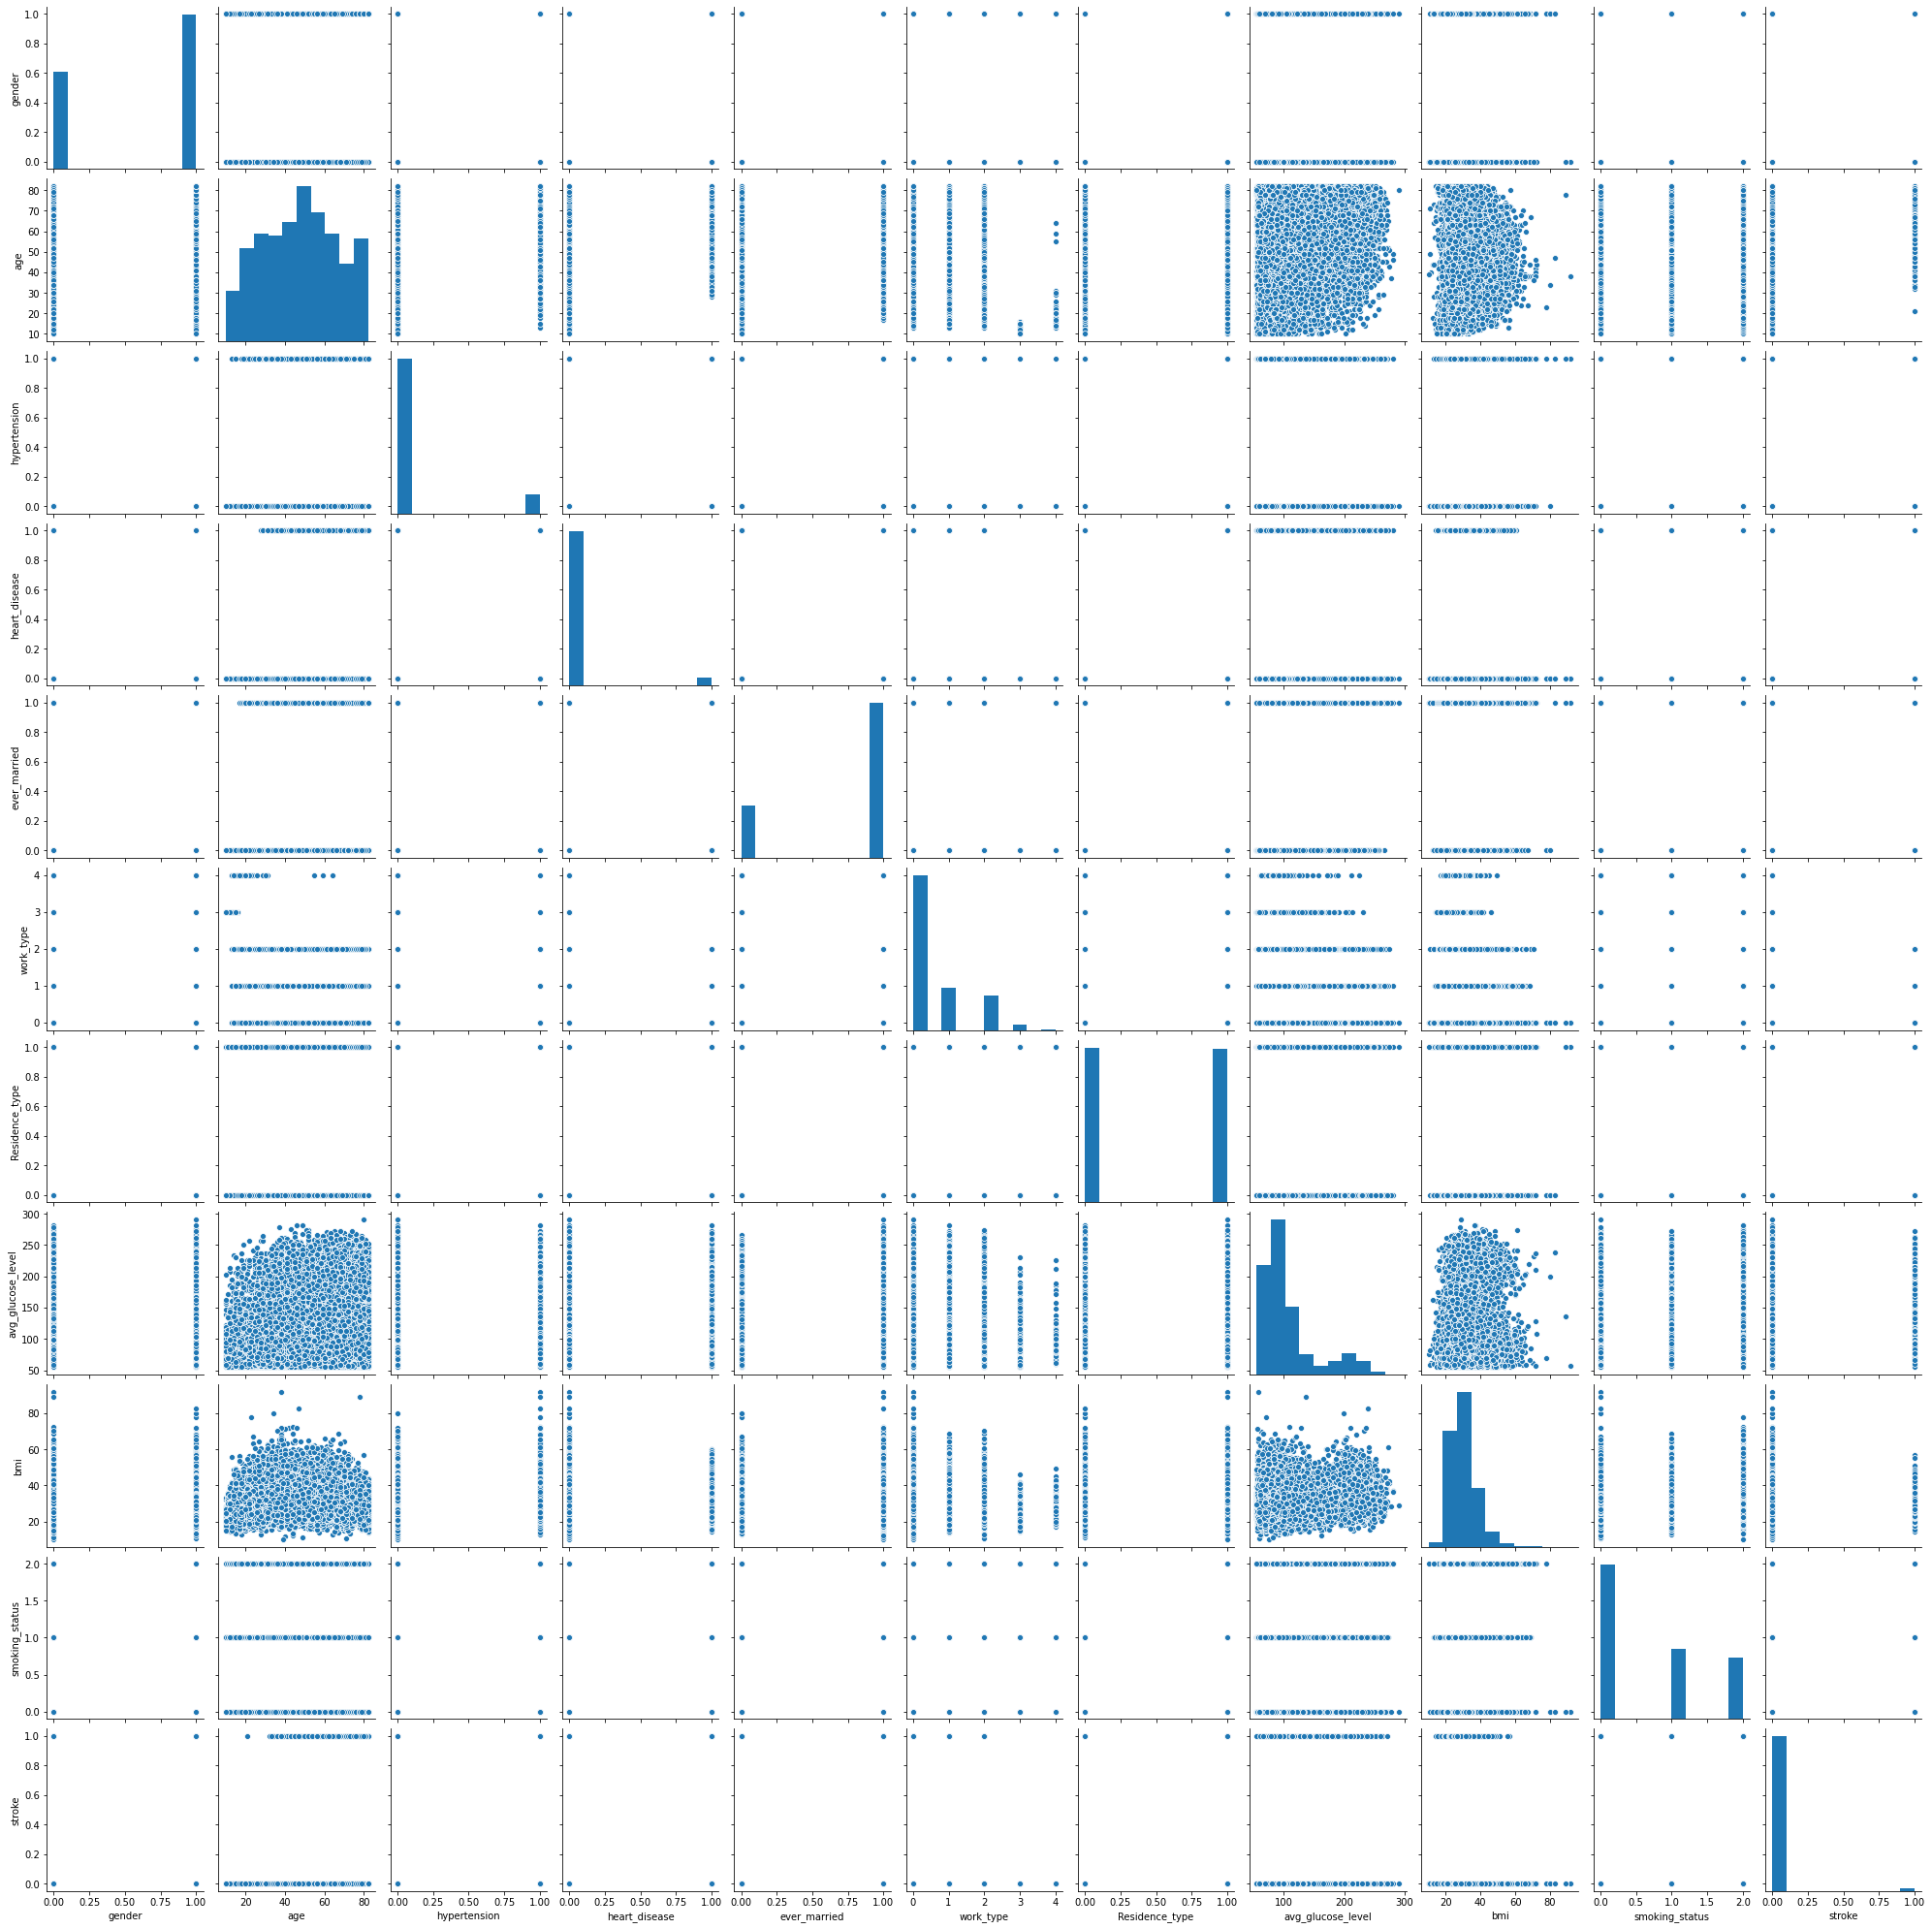

In [19]:
sns.pairplot(df)  #DIFFERENT JOINTPLOTS BETWEEN OUR FEATURES

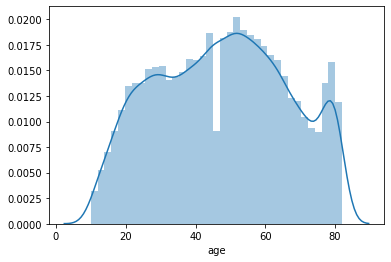

In [20]:
sns.distplot(df['age'])  #DISTRIBUTION OF AGE

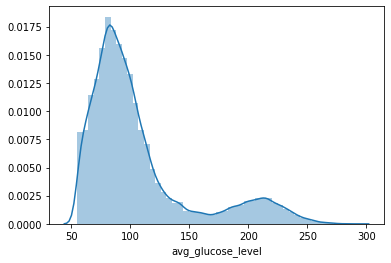

In [21]:
sns.distplot(df['avg_glucose_level'])   #DISTRIBUTION OF AVERAGE GLUCOSE LEVEL

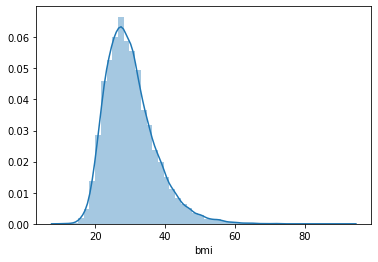

In [22]:
sns.distplot(df['bmi'])       #DISTRIBUTION OF BMI

0    28517
1      548
Name: stroke, dtype: int64


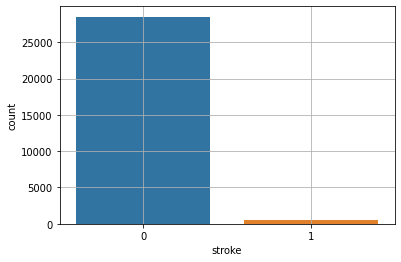

In [23]:
print(df['stroke'].value_counts())
print("="*50)
sns.countplot(df['stroke'])
plt.grid()

## AS WE CAN SEE OUR DATA IS HIGHLY IMBALANCED 

In [24]:
df.groupby(['work_type','stroke'])['stroke'].count()

work_type  stroke
0          0         18639
           1           311
1          0          5033
           1           171
2          0          4129
           1            66
3          0           615
4          0           101
Name: stroke, dtype: int64

In [25]:
df.groupby(['smoking_status','stroke'])['stroke'].count()

smoking_status  stroke
0               0         15490
                1           256
1               0          6913
                1           180
2               0          6114
                1           112
Name: stroke, dtype: int64

### USING OVERSAMPLING METHOD SMOTE TO BALANCE THE DATASET

In [26]:
sm = SMOTE()

In [27]:
sm = SMOTE()
x = df.drop('stroke',axis=1)
y = df['stroke']

In [28]:
x_oversampled,y_oversampled = sm.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
x_oversampled.shape

(57034, 10)

In [30]:
y_oversampled.shape

(57034,)

In [31]:
sum(y_oversampled == 0)

28517

In [32]:
sum(y_oversampled == 1)

28517

##### AS WE CAN SEE ABOVE WE NOW HAVE EQUAL NUMBER OF SAMPLES FOR BOTH CLASSES OF OUR DATASET

### PERFORMED PCA TO VISUALIZE DATA AS WELL AS ELBOW METHOD TO SEE IF WE CAN REDUCE DIMENSIONS OF OUR DATA

In [33]:
x_over = x_oversampled

In [38]:
sc = StandardScaler()
x_over_scaled = sc.fit_transform(x_over)  #SCALED FOR PCA

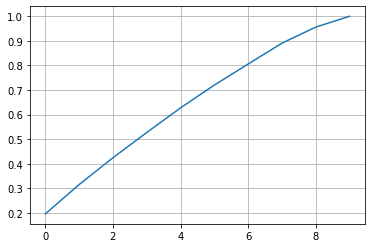

In [39]:
pca = PCA()                       # ELBOW METHOD FOR DETERMINING THE RIGHT NUMBER OF DIMENSIONS TO REDUCE THE DATA TO.
pca.fit_transform(x_over_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()        # WE CAN SEE BELOW THAT FOR PRESERVING MORE THAT 90 PERCENT VARIANCE WE NEED AT LEAST 7 DIMENSIONS THUS NOT REDUCING ANY DIMENSION HERE

In [40]:
pca_new =  PCA(n_components=2)   # TO VISUALIZE OUR DATA REDUCING DIMENSIONS TO 2
x_pca = pca_new.fit_transform(x_over_scaled)

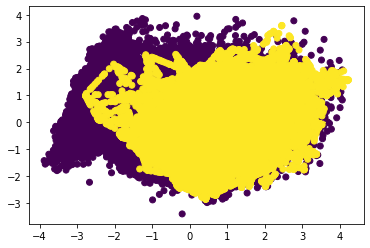

In [41]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_oversampled)   #DATA PLOT WITH CLASS

----------------------

### SPLITTING OUR DATASET TO TRAIN , TEST

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_oversampled,y_oversampled,test_size=0.33)

**## APPLYING DIFFERENT MODELS ON OVERSAMPLED DATA(NOT SCALED)**


In [43]:
#LOGISTIC REGRESSION

lg_oversampled = LogisticRegression(max_iter = 500)
lg_oversampled.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
y_pred_lg_oversampled = lg_oversampled.predict(x_test)

In [97]:
confusion_matrix(y_test,y_pred_lg_oversampled)

array([[6907, 2506],
       [1860, 7549]])

In [99]:
accuracy_score(y_test,y_pred_lg_oversampled)*100

76.80374030389969

###### we get 76.8% accuracy in logistic regression.

------------------

In [101]:
## SUPPORT VECTOR MACHINES(RBF KERNEL)

svc = SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
y_pred_svc_oversampled = svc.predict(x_test)

In [104]:
confusion_matrix(y_test,y_pred_svc_oversampled)

array([[6453, 2960],
       [1567, 7842]])

In [105]:
accuracy_score(y_test,y_pred_svc_oversampled)*100

75.9483583041122

##### we get 75.9% accuracy in svc with rbf kernel.

-------------

In [106]:
## SUPPORT VECTOR MACHINES(POLYNOMIAL KERNEL)

svc_poly = SVC(kernel = 'poly')
svc_poly.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
y_pred_svc_poly_oversampled = svc_poly.predict(x_test)

In [108]:
confusion_matrix(y_test,y_pred_svc_poly_oversampled)

array([[7147, 2266],
       [2140, 7269]])

In [109]:
accuracy_score(y_test,y_pred_svc_poly_oversampled)*100

76.59122303687175

##### we get 76.5% accuracy in svc with polynomial kernel.

------------------------------------------------------------------------------------------------------------------

In [91]:
# KNN CLASSIFIER

knn_oversampled = KNeighborsClassifier()
knn_oversampled.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
y_pred_knn_oversampled = knn_oversampled.predict(x_test)

In [93]:
confusion_matrix(y_test,y_pred_knn_oversampled)

array([[7777, 1617],
       [  92, 9336]])

In [94]:
accuracy_score(y_test,y_pred_knn_oversampled)*100

90.92019976623101

##### we get 90.9% accuracy in knn.

------------------------------------------------------------------------------------------------------------------

In [ ]:
#RANDOM FOREST CLASSIFIER

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_rfc)

array([[9352,   13],
       [ 191, 9266]])

##### we get 98.9% accuracy on random forest classifier.

------------------------------------------------------------------------------------------------------------------

**## SCALING THE OVERSAMPLED DATA FOR NEURAL NETWORKS AND THEN SPLITING THE DATASET WITH TEST RATIO OF 0.25**

In [44]:
x_oversampled_scaled = sc.fit_transform(x_oversampled)

In [45]:
x_train_nn,x_test_nn,y_train_nn,y_test_nn = train_test_split(x_oversampled_scaled,y_oversampled,test_size=0.25)

------------------------------------------------------------------------------------------------------------------

In [48]:
model1 = models.Sequential([
                   layers.Dense(x_train_nn.shape[1],activation='relu',input_dim=x_train_nn.shape[1]),
                   layers.Dense(32,activation ='relu'),
                   layers.Dense(16,activation = 'relu'),
                   layers.Dense(1,activation ='sigmoid')
])

In [49]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,007
Trainable params: 1,007
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(patience=15)

In [52]:
model1.fit(x_train_nn, y_train_nn, validation_data = (x_test_nn,y_test_nn), callbacks = [early_stop], epochs=100)

Train on 42775 samples, validate on 14259 samples
Epoch 1/100
42775/42775 [==============================] - 3s 62us/step - loss: 0.4720 - accuracy: 0.7806 - val_loss: 0.4184 - val_accuracy: 0.8111
Epoch 2/100
42775/42775 [==============================] - 2s 49us/step - loss: 0.3736 - accuracy: 0.8310 - val_loss: 0.3239 - val_accuracy: 0.8609
Epoch 3/100
42775/42775 [==============================] - 2s 49us/step - loss: 0.3017 - accuracy: 0.8666 - val_loss: 0.2830 - val_accuracy: 0.8755
Epoch 4/100
42775/42775 [==============================] - 2s 49us/step - loss: 0.2633 - accuracy: 0.8842 - val_loss: 0.2588 - val_accuracy: 0.8832
Epoch 5/100
42775/42775 [==============================] - 2s 48us/step - loss: 0.2412 - accuracy: 0.8927 - val_loss: 0.2395 - val_accuracy: 0.8906
Epoch 6/100
42775/42775 [==============================] - 2s 45us/step - loss: 0.2285 - accuracy: 0.8984 - val_loss: 0.2255 - val_accuracy: 0.8964
Epoch 7/100
42775/42775 [==============================] - 2s 

In [53]:
y_pred_nn = model1.predict_classes(x_test_nn)

In [54]:
confusion_matrix(y_test_nn,y_pred_nn)

array([[6567,  596],
       [ 561, 6535]])

In [55]:
accuracy_score(y_test_nn,y_pred_nn)

0.9188582649554667

##### NEURAL NETWORKS MODEL1 GIVES US 91.8% ACCURACY

------------------------------------------------------------------------------------------------------------------

In [57]:
model2 = models.Sequential([
                   layers.Dense(x_train_nn.shape[1],activation='relu',input_dim=x_train_nn.shape[1]),
                   layers.Dense(32,activation ='relu'),
                   layers.Dense(64,activation = 'relu'),
                   layers.Dense(32,activation ='relu'),
                   layers.Dense(8,activation ='relu'),
                   layers.Dense(1,activation ='sigmoid')
])

In [58]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 4,927
Trainable params: 4,927
Non-trainable params: 0
____________________________________________________

In [60]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(patience=15)

In [61]:
model2.fit(x_train_nn, y_train_nn, validation_data = (x_test_nn,y_test_nn), callbacks = [early_stop], epochs=100)

Train on 42775 samples, validate on 14259 samples
Epoch 1/100
42775/42775 [==============================] - 2s 55us/step - loss: 0.4427 - accuracy: 0.7913 - val_loss: 0.3703 - val_accuracy: 0.8288
Epoch 2/100
42775/42775 [==============================] - 2s 51us/step - loss: 0.3473 - accuracy: 0.8395 - val_loss: 0.3044 - val_accuracy: 0.8622
Epoch 3/100
42775/42775 [==============================] - 2s 51us/step - loss: 0.2956 - accuracy: 0.8634 - val_loss: 0.2652 - val_accuracy: 0.8822
Epoch 4/100
42775/42775 [==============================] - 2s 52us/step - loss: 0.2666 - accuracy: 0.8775 - val_loss: 0.2761 - val_accuracy: 0.8759
Epoch 5/100
42775/42775 [==============================] - 2s 51us/step - loss: 0.2504 - accuracy: 0.8840 - val_loss: 0.2399 - val_accuracy: 0.8886
Epoch 6/100
42775/42775 [==============================] - 2s 52us/step - loss: 0.2362 - accuracy: 0.8916 - val_loss: 0.2231 - val_accuracy: 0.8988
Epoch 7/100
42775/42775 [==============================] - 2s 

In [62]:
y_pred_model2 = model2.predict_classes(x_test_nn)

In [63]:
confusion_matrix(y_test_nn,y_pred_model2)

array([[6585,  578],
       [ 273, 6823]])

In [64]:
accuracy_score(y_test_nn,y_pred_model2)

0.9403183953993969

###### NEURAL NETWORKS MODEL2 GIVES US 94.0% ACCURACY

------------------------------------------------------------------------------------------------------------------

In [65]:
model3 = models.Sequential([
                   layers.Dense(x_train_nn.shape[1],activation='relu',input_dim=x_train_nn.shape[1]),
                   layers.Dense(32,activation ='relu'),
                   layers.Dense(64,activation = 'relu'),
                   layers.Dense(128,activation = 'relu'),
                   layers.Dense(64,activation = 'relu'),
                   layers.Dense(32,activation ='relu'),
                   layers.Dense(8,activation ='relu'),
                   layers.Dense(1,activation ='sigmoid')
])

In [66]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                

In [68]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop2 = EarlyStopping(patience=10)

In [69]:
model3.fit(x_train_nn, y_train_nn, validation_data = (x_test_nn,y_test_nn), callbacks = [early_stop2], epochs=100)

Train on 42775 samples, validate on 14259 samples
Epoch 1/100
42775/42775 [==============================] - 3s 67us/step - loss: 0.4682 - accuracy: 0.7821 - val_loss: 0.3938 - val_accuracy: 0.8294
Epoch 2/100
42775/42775 [==============================] - 3s 66us/step - loss: 0.3548 - accuracy: 0.8360 - val_loss: 0.3182 - val_accuracy: 0.8492
Epoch 3/100
42775/42775 [==============================] - 3s 66us/step - loss: 0.2958 - accuracy: 0.8620 - val_loss: 0.2741 - val_accuracy: 0.8736
Epoch 4/100
42775/42775 [==============================] - 3s 64us/step - loss: 0.2658 - accuracy: 0.8753 - val_loss: 0.2711 - val_accuracy: 0.8726
Epoch 5/100
42775/42775 [==============================] - 3s 61us/step - loss: 0.2425 - accuracy: 0.8873 - val_loss: 0.2251 - val_accuracy: 0.8982
Epoch 6/100
42775/42775 [==============================] - 3s 61us/step - loss: 0.2257 - accuracy: 0.8965 - val_loss: 0.2541 - val_accuracy: 0.8858
Epoch 7/100
42775/42775 [==============================] - 3s 

In [70]:
y_pred_model3 = model3.predict_classes(x_test_nn)

In [71]:
confusion_matrix(y_test_nn,y_pred_model3)

array([[6772,  391],
       [ 238, 6858]])

In [72]:
accuracy_score(y_test_nn,y_pred_model3)

0.9558875096430325

###### NEURAL NETWORKS MODEL3 GIVES US 95.5% ACCURACY

------------------------------------------------------------------------------------------------------------------

In [73]:
#LOGISTIC REGRESSION ON OVERSAMPLED SCALED DATA

lg_oversampled_scaled = LogisticRegression(max_iter = 500)
lg_oversampled_scaled.fit(x_train_nn,y_train_nn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred_lg_oversampled_scaled = lg_oversampled_scaled.predict(x_test_nn)

In [76]:
confusion_matrix(y_test_nn,y_pred_lg_oversampled_scaled)

array([[5297, 1866],
       [1370, 5726]])

In [77]:
accuracy_score(y_test_nn,y_pred_lg_oversampled_scaled)

0.7730556139981766

##### LOGISTIC REGRESSION AFTER SCALING THE DATA GIVES US 77.3% ACCURACY.

------------------------------------------------------------------------------------------------------------------

In [78]:
#SVC RBF KERNEL ON OVERSAMPLED SCALED DATA

svc_s = SVC()
svc_s.fit(x_train_nn,y_train_nn)
y_pred_svc_s = svc_s.predict(x_test_nn)
confusion_matrix(y_test_nn,y_pred_svc_s)

array([[6980,  183],
       [ 831, 6265]])

In [79]:
accuracy_score(y_test_nn,y_pred_svc_s)

0.9288870187250158

##### SVC AFTER SCALING THE DATA GIVES US 92.8% ACCURACY.

------------------------------------------------------------------------------------------------------------------

In [80]:
#RANDOM FOREST CLASSIFIER ON OVERSAMPLED SCALED DATA

rfc_scaled = RandomForestClassifier()
rfc_scaled.fit(x_train_nn,y_train_nn)
y_pred_rfc_scaled = rfc_scaled.predict(x_test_nn)

In [81]:
confusion_matrix(y_test_nn,y_pred_rfc_scaled)

array([[7151,   12],
       [ 139, 6957]])

In [82]:
accuracy_score(y_test_nn,y_pred_rfc_scaled)

0.9894101970685182

##### RANDOM FOREST AFTER SCALING THE DATA GIVES US 98.9% ACCURACY.

------------------------------------------------------------------------------------------------------------------

In [84]:
#NAIVE BAYES CLASSIFIER ON OVERSAMPLED SCALED DATA

nbc = GaussianNB()
nbc.fit(x_train_nn,y_train_nn)
y_pred_nbc = nbc.predict(x_test_nn)

In [85]:
confusion_matrix(y_test_nn,y_pred_nbc)

array([[5229, 1934],
       [1308, 5788]])

In [87]:
accuracy_score(y_test_nn,y_pred_nbc)

0.7726348271267269

##### NAIVE BAYES AFTER SCALING THE DATA GIVES US 77.2% ACCURACY.

------------------------------------------------------------------------------------------------------------------

In [88]:
# KNN CLASSIFIER ON OVERSAMPLED SCALED DATA

knn = KNeighborsClassifier()
knn.fit(x_train_nn,y_train_nn)
y_pred_knn = knn.predict(x_test_nn)

In [89]:
confusion_matrix(y_test_nn,y_pred_knn)

array([[6671,  492],
       [  35, 7061]])

In [90]:
accuracy_score(y_test_nn,y_pred_knn)

0.9630408864576758

##### KNN CLASSIFIER AFTER SCALING THE DATA GIVES US 96.3% ACCURACY.

------------------------------------------------------------------------------------------------------------------